In [1]:
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MaxNLocator

In [2]:
distortions = [np.load(f'saved_original/distortion_jumps_{i}.npy') for i in range(5)]

In [3]:
nsels = np.load('saved_original/selected_ops.npz')
nsels = [nsels[i] for i in list(nsels)]

In [4]:
[len(i) for i in nsels]

[30, 35, 30, 30, 30]

In [5]:
colors = ['green', 'darkturquoise', 'indianred', 'blueviolet', 'gray']

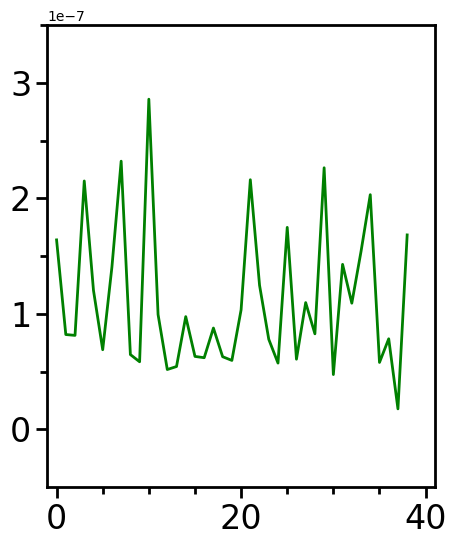

In [17]:
i=0

fig,ax = plt.subplots(1,figsize=(5,6))
ax.spines[:].set_linewidth(2)
ax.set_xlim(-1,41)
ax.set_ylim(-0.5e-7,3.5e-7)
ax.set_xticks([0,20,40])
ax.set_yticks([0.0e-7,1e-7,2e-7,3e-7])
ax.tick_params(length=8, width=2, labelsize=24)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.tick_params(which='minor', length=5, width=2)
#
ax.plot(distortions[i], lw=2, color=colors[i])
#
plt.savefig(f'saved_plots/distortion_{i}.png', transparent=True)
plt.show()

In [6]:
hfast = np.load('saved_fast/hists.npy')
efast = np.load('saved_fast/extents.npy')
dfast = [np.load(f'saved_fast/distortion_jumps_{i}.npy') for i in range(5)]
sfast = np.load('saved_fast/selected_ops.npz')
sfast = [sfast[i] for i in list(sfast)]

In [7]:
[len(i) for i in  soriginal]

[30, 35, 30, 30, 30]

In [8]:
[len(i) for i in sfast]

[7, 7, 7, 7, 14]

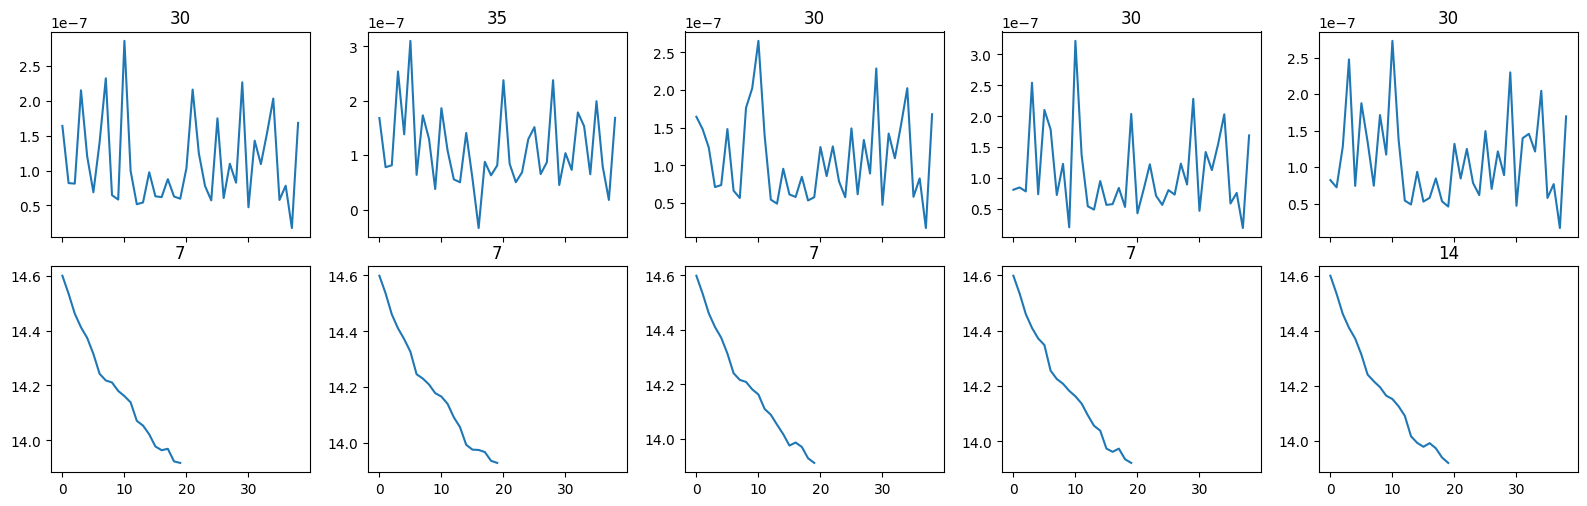

In [9]:
fig,ax=plt.subplots(2,5,figsize=(16,5), sharex=True)
plt.tight_layout()
data, labels = [doriginal, dfast], [soriginal, sfast]
for a,i in enumerate(data):
    for b,j in enumerate(i):
        ax[a,b].plot(j)
        ax[a,b].set_title(f'{len(labels[a][b])}')
plt.show()

In [10]:
coriginal=[nh.classification_extent(i, cutoff=0.1, strategy='weighted',
                            output_type='jm', operation=2, jm_lower=weight, jm_impure=impures) for i in horiginal]
coriginal

[0.3253233407631168,
 0.27560143857508684,
 0.38394049198757974,
 0.39518003160296755,
 0.3440900087581663]

In [11]:
np.mean(coriginal), np.std(coriginal)

(0.3448270623373834, 0.04298466536188436)

In [12]:
cfast=[nh.classification_extent(i, cutoff=0.1, strategy='weighted',
                            output_type='jm', operation=2, jm_lower=weight, jm_impure=impures) for i in hfast]
cfast

[0.600631635359141,
 0.6782867683342648,
 0.6706277281160308,
 0.6704905930028747,
 0.44343317743667177]

In [13]:
np.mean(cfast), np.std(cfast)

(0.6126939804497966, 0.08921199579592004)